**----------------------------------------------------------------------------------** 
# **Análisis exploratorio de datos (EDA)**

**Importo mxmh_survey_results.csv**

In [ ]:
!pip install pandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pandas as pd
from google.colab import drive

In [ ]:
df = pd.read_csv("/content/mxmh_survey_results.csv")
df.head()

,Timestamp,Age,Primary streaming service,Hours per day,While working,Instrumentalist,Composer,Fav genre,Exploratory,Foreign languages,...,Frequency [R&B],Frequency [Rap],Frequency [Rock],Frequency [Video game music],Anxiety,Depression,Insomnia,OCD,Music effects,Permissions
0,8/27/2022 19:29:02,18.0,Spotify,3.0,Yes,Yes,Yes,Latin,Yes,Yes,...,Sometimes,Very frequently,Never,Sometimes,3.0,0.0,1.0,0.0,NaN,I understand.
1,8/27/2022 19:57:31,63.0,Pandora,1.5,Yes,No,No,Rock,Yes,No,...,Sometimes,Rarely,Very frequently,Rarely,7.0,2.0,2.0,1.0,NaN,I understand.
2,8/27/2022 21:28:18,18.0,Spotify,4.0,No,No,No,Video game music,No,Yes,...,Never,Rarely,Rarely,Very frequently,7.0,7.0,10.0,2.0,No effect,I understand.
3,8/27/2022 21:40:40,61.0,YouTube Music,2.5,Yes,No,Yes,Jazz,Yes,Yes,...,Sometimes,Never,Never,Never,9.0,7.0,3.0,3.0,Improve,I understand.
4,8/27/2022 21:54:47,18.0,Spotify,4.0,Yes,No,No,R&B,Yes,No,...,Very frequently,Very frequently,Never,Rarely,7.0,2.0,5.0,9.0,Improve,I understand.


In [ ]:
# Indico las dimensiones de la matriz 
df.shape

(736, 33)

In [ ]:
# Obtengo los tipos de datos de cada columna 
df.dtypes

Timestamp                        object
Age                             float64
Primary streaming service        object
Hours per day                   float64
While working                    object
Instrumentalist                  object
Composer                         object
Fav genre                        object
Exploratory                      object
Foreign languages                object
BPM                             float64
Frequency [Classical]            object
Frequency [Country]              object
Frequency [EDM]                  object
Frequency [Folk]                 object
Frequency [Gospel]               object
Frequency [Hip hop]              object
Frequency [Jazz]                 object
Frequency [K pop]                object
Frequency [Latin]                object
Frequency [Lofi]                 object
Frequency [Metal]                object
Frequency [Pop]                  object
Frequency [R&B]                  object
Frequency [Rap]                  object


El conjunto de datos contiene 736 filas y 33 columnas:

1.	**Timestamp:** La fecha y hora en que se completó la encuesta
2.	**Age:** La edad del encuestado en años
3.  **Primary streaming service:** El principal servicio de streaming que utiliza el encuestado
4.  **Hours per day:** Número de horas que el encuestado escucha música al día
5.  **While working:** Si el encuestado escucha música mientras trabaja
6.  **Instrumentalist:** Si el encuestado toca un instrumento regularmente
7.  **Composer:** Si el encuestado compone música
8.  **Fav genre:** Género favorito del encuestado
9.  **Exploratory:** Si el encuestado explora nuevos artistas o géneros
10. **Foreign languages:** Si el encuestado escucha música con letras en un idioma que no domina
11. **BPM:** Beats (número de pulsaciones) por minuto del género favorito del encuestado.
12. **Frequency [Classical]:** Con qué frecuencia el encuestado escucha música clásica
13. **Frequency [Country]:** Con qué frecuencia el encuestado escucha música country
14. **Frequency [EDM]**: Con qué frecuencia el encuestado escucha música EDM
15. **Frequency [Folk]:** Con qué frecuencia el encuestado escucha folk
16. **Frequency [Gospel]:** Con qué frecuencia el encuestado escucha música gospel
17. **Frequency [Hip hop]:** Con qué frecuencia el encuestado escucha hip hop
18. **Frequency [Jazz]:** Con qué frecuencia el encuestado escucha jazz
19. **Frequency [K pop]:** Con qué frecuencia el encuestado escucha k-pop
20. **Frequency [Latin]:** Con qué frecuencia el encuestado escucha música latina
21. **Frequency [Lofi]:** Con qué frecuencia el encuestado escucha lofi
22. **Frequency [Metal]:** Con qué frecuencia el encuestado escucha metal
23. **Frequency [Pop]:** Con qué frecuencia el encuestado escucha pop
24. **Frequency [R&B]:** Con qué frecuencia el encuestado escucha R&B
25. **Frequency [Rap]:** Con qué frecuencia el encuestado escucha rap
26. **Frequency [Rock]:** Con qué frecuencia el encuestado escucha rock
27. **Frequency [Video game music]:** Con qué frecuencia el encuestado escucha música de Video
28. **Anxiety:** Ansiedad autoinformada. En una escala de 0-10 qué tanto siente ansioso el encuestado
29. **Depression:** Depresión autoinformada. En una escala de 0-10 qué tanto se siente depresivo el encuestado
30. **Insomnia:** Insomnio autoinformado. En una escala de 0-10 qué tanto insomnio padece el encuestado
31. **OCD:** Síntomas de trastorno obsesivo compulsivo autoinformados. En una escala de 0-10 qué tantos síntomas de TOC padece el encuestado
32. **Music effects:** Si el encuestado siente que la música mejora o empeora las condiciones de su salud mental 
33. **Permissions:** Consentimiento por parte del encuestado de hacer públicas sus respuestas

**Limpio los datos**

In [ ]:
# Elimino la columna "Permissions" porque no me proporciona un uso relevante
df = df.drop(columns=["Permissions", "Timestamp"])

In [ ]:
# Verifico si hay filas duplicadas, si los hubiese, los duplicados se eliminarán directamente del conjunto original sin crear una copia
duplicados = df.duplicated()
print(duplicados)
df.drop_duplicates(inplace=True)

0      False
1      False
2      False
3      False
4      False
       ...  
731    False
732    False
733    False
734    False
735    False
Length: 736, dtype: bool


In [ ]:
# Elimino todas las filas que contengan al menos un valor faltante (NaN)
df = df.dropna()

In [ ]:
# Verifico que los valores de las columnas categoricas (objeto) sean consistentes y no posean errores
for col in df.select_dtypes(include=['object']): # (!) itero a través de cada columna object
  unique_values = df[col].unique() # (!)  reviso los valores únicos en cada columna object
  unique_values.sort()
print(f"Valores únicos en la columna {col}:") # (!) f para insertar el nombre de la columna
print(unique_values)

# Corrijo cualquier error tipográfico   
df[col] = df[col].str.lower()
print(df)

Valores únicos en la columna Music effects:
['Improve' 'No effect' 'Worsen']
      Age Primary streaming service  Hours per day While working  \
2    18.0                   Spotify            4.0            No   
3    61.0             YouTube Music            2.5           Yes   
4    18.0                   Spotify            4.0           Yes   
5    18.0                   Spotify            5.0           Yes   
6    18.0             YouTube Music            3.0           Yes   
..    ...                       ...            ...           ...   
731  17.0                   Spotify            2.0           Yes   
732  18.0                   Spotify            1.0           Yes   
733  19.0   Other streaming service            6.0           Yes   
734  19.0                   Spotify            5.0           Yes   
735  29.0             YouTube Music            2.0           Yes   

    Instrumentalist Composer         Fav genre Exploratory Foreign languages  \
2                No       

<ipython-input-725-aa1cc36a3263>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = df[col].str.lower()


In [ ]:
# Convierto las columnas de tipo "object" en variables numéricas antes de usarlas como entrada en la red neuronal
from sklearn.preprocessing import LabelEncoder
object_columns = df.select_dtypes(include='object').columns #Selecciono únicamente las columnas object
le = LabelEncoder() #Convierto cada columna object en numérica utilizando LabelEncoder()
for col in object_columns:
    df[col] = le.fit_transform(df[col])

<ipython-input-726-622dd3ca05cb>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = le.fit_transform(df[col])
<ipython-input-726-622dd3ca05cb>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = le.fit_transform(df[col])
<ipython-input-726-622dd3ca05cb>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_gui

In [ ]:
# Utilizo la función "MinMaxScales" de la librería "sklearn" para normalizar los datos del dataframe
## (!!!) La normalización de datos implica transformar las características de un conjunto de datos para que tengan una escala común. 
### Cuando se utiliza un modelo de red neuronal (librería Keras), se suele normalizar únicamente las columnas con valores numéricos. 
#### Los normalizo entonces, porque 1) los modelos de redes neuronales funcionan mejor con datos que estén en un rango similar
##### y 2) porque así me aseguro de que cada característica tenga un peso igual en el análisis. 
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df_numeric = df.select_dtypes(include='number')
normalized_data = scaler.fit_transform(df_numeric)
df_normalized = pd.DataFrame(normalized_data, columns=df_numeric.columns)
df = pd.concat([df.drop(df_numeric.columns, axis=1), df_normalized], axis=1)


In [ ]:
# Finalmente, siendo que la librería Keras requiere que las columnas sean de tipo float32 para poder trabajar con ellas 
## en operaciones matemáticas (de una forma más rápida y eficiente), transformo todas los datos en float32.
df = df.astype("float32")
df.dtypes


Age                             float32
Primary streaming service       float32
Hours per day                   float32
While working                   float32
Instrumentalist                 float32
Composer                        float32
Fav genre                       float32
Exploratory                     float32
Foreign languages               float32
BPM                             float32
Frequency [Classical]           float32
Frequency [Country]             float32
Frequency [EDM]                 float32
Frequency [Folk]                float32
Frequency [Gospel]              float32
Frequency [Hip hop]             float32
Frequency [Jazz]                float32
Frequency [K pop]               float32
Frequency [Latin]               float32
Frequency [Lofi]                float32
Frequency [Metal]               float32
Frequency [Pop]                 float32
Frequency [R&B]                 float32
Frequency [Rap]                 float32
Frequency [Rock]                float32


In [ ]:
# Indico nuevamente las dimensiones de la matriz 
df.shape


(721, 31)

In [ ]:
# Observo el conjunto final con el que voy a trabajar
df.head()

,Age,Primary streaming service,Hours per day,While working,Instrumentalist,Composer,Fav genre,Exploratory,Foreign languages,BPM,...,Frequency [Pop],Frequency [R&B],Frequency [Rap],Frequency [Rock],Frequency [Video game music],Anxiety,Depression,Insomnia,OCD,Music effects
2,0.101266,0.8,0.166667,1.0,0.0,0.0,0.800000,1.0,0.0,1.070000e-07,...,0.666667,1.000000,1.000000,0.0,0.333333,0.7,0.2,0.5,0.9,0.0
3,0.101266,0.8,0.208333,1.0,1.0,1.0,0.400000,1.0,1.0,8.600000e-08,...,1.000000,1.000000,1.000000,1.0,0.000000,0.8,0.8,0.7,0.7,0.0
4,0.101266,1.0,0.125000,1.0,1.0,0.0,1.000000,1.0,1.0,6.600000e-08,...,0.333333,0.333333,0.000000,0.0,0.666667,0.4,0.8,0.6,0.0,0.0
5,0.139241,0.8,0.041667,1.0,0.0,0.0,0.466667,1.0,1.0,9.500000e-08,...,0.666667,0.666667,0.333333,0.0,0.333333,0.5,0.3,0.5,0.3,0.0
6,0.113924,0.8,0.250000,1.0,0.0,0.0,0.933333,0.0,0.0,9.400000e-08,...,0.000000,0.000000,0.000000,1.0,0.000000,0.2,0.0,0.0,0.0,0.0


**----------------------------------------------------------------------------------** 
# **Red Neuronal V1**

In [ ]:
!pip install tensorflow
!pip install keras


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


**División de los datos de entrada (x) y de salida (y)**

In [ ]:
#Elimino los NaN porque sino más adelante la pérdida en el conjunto de validación de una red neuronal será NaN
df = df.dropna() 

In [ ]:
#Realizo la división entre columna a predecir (Y) y predictoras (X)
X = df[df.columns.drop('Music effects')]
Y = pd.get_dummies(df['Music effects'], columns=['Music effects'])

In [ ]:
# Verifico si hay valores NaN o infinitos en los datos de entrada

import numpy as np 

print(np.isnan(X).sum())

print(np.isinf(X).sum()) 

Age                             0
Primary streaming service       0
Hours per day                   0
While working                   0
Instrumentalist                 0
Composer                        0
Fav genre                       0
Exploratory                     0
Foreign languages               0
BPM                             0
Frequency [Classical]           0
Frequency [Country]             0
Frequency [EDM]                 0
Frequency [Folk]                0
Frequency [Gospel]              0
Frequency [Hip hop]             0
Frequency [Jazz]                0
Frequency [K pop]               0
Frequency [Latin]               0
Frequency [Lofi]                0
Frequency [Metal]               0
Frequency [Pop]                 0
Frequency [R&B]                 0
Frequency [Rap]                 0
Frequency [Rock]                0
Frequency [Video game music]    0
Anxiety                         0
Depression                      0
Insomnia                        0
OCD           

In [ ]:
print(X.dtypes)

Age                             float32
Primary streaming service       float32
Hours per day                   float32
While working                   float32
Instrumentalist                 float32
Composer                        float32
Fav genre                       float32
Exploratory                     float32
Foreign languages               float32
BPM                             float32
Frequency [Classical]           float32
Frequency [Country]             float32
Frequency [EDM]                 float32
Frequency [Folk]                float32
Frequency [Gospel]              float32
Frequency [Hip hop]             float32
Frequency [Jazz]                float32
Frequency [K pop]               float32
Frequency [Latin]               float32
Frequency [Lofi]                float32
Frequency [Metal]               float32
Frequency [Pop]                 float32
Frequency [R&B]                 float32
Frequency [Rap]                 float32
Frequency [Rock]                float32


In [ ]:
#Para verificar el número de columnas
#X.shape[1]
#Y.shape[1]


**Definición de la arquitectura del modelo**

In [ ]:
import tensorflow as tf
from tensorflow import keras

#Arquitectura del modelo elegida = modelo secuencial
from keras import models
from keras import layers
model = models.Sequential()

model.add(layers.Dense(64, activation='relu', input_shape=(X.shape[1],))) #Primer capa, capa oculta de 64 nodos full conectados, con una entrada igual a la longitud del vector
model.add(layers.Dense(64, activation='relu')) #Segunda capa, capa oculta
model.add(layers.Dense(Y.shape[1], activation='softmax')) #Tercer capa, capa de salida. Para para cada muestra de entrada (input sample), la red generará según el tamaño de la dimensión de la salida 

### ReLU (Rectified Linear Unit) = Para introducir no linealidad en las capas ocultas y así mejorar la capacidad de clasificación del modelo
#### Softmax = Para producir salidas en forma de probabilidades distribuidas

In [ ]:
#Resumen del modelo de red neuronal
model.summary()

Model: "sequential_27"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_72 (Dense)            (None, 64)                1984      
                                                                 
 dense_73 (Dense)            (None, 64)                4160      
                                                                 
 dense_74 (Dense)            (None, 3)                 195       
                                                                 
Total params: 6,339
Trainable params: 6,339
Non-trainable params: 0
_________________________________________________________________


**Proceso de Aprendizaje**

Para el entrenamiento es necesario:
1. **Función perdida (loss function)** para medir el rendimiento
2. **Optimizador (optimizer)** para que la red neuronal se vaya actualizando según el loss function y los datos
3. **Métricas (metrics)** para monitorear el entrenamiento y las pruebas. En este caso, será accuracy (verificación de si las clasificaciones hechas son correctas o no)

In [ ]:
from keras import optimizers
from keras import losses
from keras import metrics


model.compile(optimizer=optimizers.RMSprop(lr=0.001), #Optimizador RMSprop con una tasa de aprendizaje (learning rate) a 0.001 

### Si la tasa de aprendizaje es demasiado pequeña, el modelo puede tardar mucho tiempo en converger hacia una solución óptima. 
#### Si la tasa de aprendizaje es demasiado grande, el modelo puede oscilar o divergir lejos de una solución óptima.

loss=losses.categorical_crossentropy, #Función perdida de entropía cruzada categórica (categorical crossentropy) porque es un problema de clasificación

metrics=[metrics.categorical_accuracy]) #Métrica de precisión categórica (categorical accuracy)

/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/rmsprop.py:143: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


**Preparación del conjunto de validación**

Para evaluar el rendimiento de un modelo de aprendizaje automático durante su entrenamiento.

In [ ]:
# Divido un conjunto de datos en un conjunto de entrenamiento y un conjunto de validación 

x_val = X[:100] #Conjunto de validación = primeras 100 filas de los datos de entrada X
partial_x_train = X[100:] #Conjunto de entrenamiento = todas las filas de los datos de entrada X excepto las primeras 100 filas

y_val = Y[:100] #Conjunto de validación = primeras 100 filas de los datos de salida Y
partial_y_train = Y[100:] #Conjunto de entrenamiento = todas las filas de los datos de entrada X excepto las primeras 100 filas

### En general, se recomienda que el tamaño del conjunto de validación esté en el rango del 10% al 30% del tamaño total del conjunto de datos. 
####  Entonces, teniendo 721 filas podría considerar un conjunto de validación de alrededor de 72 a 216 ejemplos



**Entrenamiento del modelo**

In [ ]:
#Entreno el modelo utilizando los conjuntos de entrenamiento y validación definidos anteriormente

history = model.fit(X, Y, batch_size=32, epochs=30, validation_split=0.3)
          

Epoch 1/30
14/14 [==============================] - 1s 24ms/step - loss: 0.8281 - categorical_accuracy: 0.7262 - val_loss: 0.6623 - val_categorical_accuracy: 0.7784
Epoch 2/30
14/14 [==============================] - 0s 7ms/step - loss: 0.6652 - categorical_accuracy: 0.7448 - val_loss: 0.6165 - val_categorical_accuracy: 0.7784
Epoch 3/30
14/14 [==============================] - 0s 6ms/step - loss: 0.6333 - categorical_accuracy: 0.7448 - val_loss: 0.6136 - val_categorical_accuracy: 0.7784
Epoch 4/30
14/14 [==============================] - 0s 6ms/step - loss: 0.6196 - categorical_accuracy: 0.7448 - val_loss: 0.6130 - val_categorical_accuracy: 0.7784
Epoch 5/30
14/14 [==============================] - 0s 5ms/step - loss: 0.6086 - categorical_accuracy: 0.7401 - val_loss: 0.6169 - val_categorical_accuracy: 0.7784
Epoch 6/30
14/14 [==============================] - 0s 5ms/step - loss: 0.6067 - categorical_accuracy: 0.7471 - val_loss: 0.6136 - val_categorical_accuracy: 0.7784
Epoch 7/30
14/1

**Visualizaciones**

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
model_history = pd.DataFrame(history.history)
model_history

,loss,categorical_accuracy,val_loss,val_categorical_accuracy
0,0.828061,0.726218,0.662329,0.778378
1,0.665227,0.744780,0.616524,0.778378
2,0.633287,0.744780,0.613621,0.778378
3,0.619625,0.744780,0.613000,0.778378
4,0.608614,0.740139,0.616868,0.778378
5,0.606705,0.747100,0.613643,0.778378
6,0.594827,0.747100,0.613163,0.778378
7,0.591891,0.747100,0.623420,0.778378
8,0.583961,0.751740,0.621395,0.772973
9,0.580151,0.761021,0.619661,0.772973


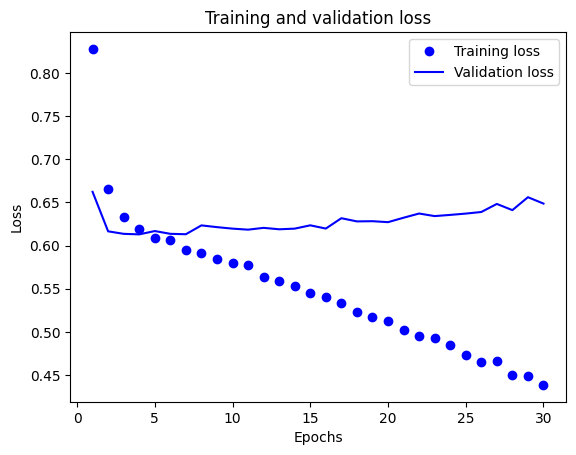

In [ ]:
# Precisión de entrenamiento y validación

loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

**Evaluación del modelo**




In [ ]:
model.evaluate(X, Y)

20/20 [==============================] - 0s 2ms/step - loss: 0.4908 - categorical_accuracy: 0.8084


[0.4907650649547577, 0.8084415793418884]

**Predicciones**

In [ ]:
model.predict(X)

20/20 [==============================] - 0s 5ms/step


array([[0.97926086, 0.01847828, 0.0022609 ],
       [0.96493506, 0.03390468, 0.00116032],
       [0.81554353, 0.15225315, 0.03220334],
       ...,
       [0.51505166, 0.47080824, 0.01414011],
       [0.9724518 , 0.02559039, 0.00195776],
       [0.9742932 , 0.02223549, 0.00347136]], dtype=float32)

**----------------------------------------------------------------------------------** 
# **Red Neuronal V2**

In [ ]:
!pip install tensorflow
!pip install keras


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


**División de los datos de entrada (x) y de salida (y)**

In [ ]:
#Elimino los NaN porque sino más adelante la pérdida en el conjunto de validación de una red neuronal será NaN
df = df.dropna() 

In [ ]:
#Realizo la división entre columna a predecir (Y) y predictoras (X)
X = df[df.columns.drop('Music effects')]
Y = pd.get_dummies(df['Music effects'], columns=['Music effects'])

In [ ]:
# Verifico si hay valores NaN o infinitos en los datos de entrada
import numpy as np  

print(np.isnan(X).sum())

print(np.isinf(X).sum())

Age                             0
Primary streaming service       0
Hours per day                   0
While working                   0
Instrumentalist                 0
Composer                        0
Fav genre                       0
Exploratory                     0
Foreign languages               0
BPM                             0
Frequency [Classical]           0
Frequency [Country]             0
Frequency [EDM]                 0
Frequency [Folk]                0
Frequency [Gospel]              0
Frequency [Hip hop]             0
Frequency [Jazz]                0
Frequency [K pop]               0
Frequency [Latin]               0
Frequency [Lofi]                0
Frequency [Metal]               0
Frequency [Pop]                 0
Frequency [R&B]                 0
Frequency [Rap]                 0
Frequency [Rock]                0
Frequency [Video game music]    0
Anxiety                         0
Depression                      0
Insomnia                        0
OCD           

In [ ]:
print(X.dtypes)

Age                             float32
Primary streaming service       float32
Hours per day                   float32
While working                   float32
Instrumentalist                 float32
Composer                        float32
Fav genre                       float32
Exploratory                     float32
Foreign languages               float32
BPM                             float32
Frequency [Classical]           float32
Frequency [Country]             float32
Frequency [EDM]                 float32
Frequency [Folk]                float32
Frequency [Gospel]              float32
Frequency [Hip hop]             float32
Frequency [Jazz]                float32
Frequency [K pop]               float32
Frequency [Latin]               float32
Frequency [Lofi]                float32
Frequency [Metal]               float32
Frequency [Pop]                 float32
Frequency [R&B]                 float32
Frequency [Rap]                 float32
Frequency [Rock]                float32


In [ ]:
#Para verificar el número de columnas
#X.shape[1]
#Y.shape[1]


**Definición de la arquitectura del modelo**

In [ ]:
import tensorflow as tf
from tensorflow import keras

#Arquitectura del modelo elegida = modelo secuencial
from keras import models
from keras import layers
model = models.Sequential()

model.add(layers.Dense(75, activation='relu', input_shape=(X.shape[1],))) #Primer capa, capa oculta de 64 nodos full conectados, con una entrada igual a la longitud del vector
model.add(layers.Dense(75, activation='relu')) #Segunda capa, capa oculta
model.add(layers.Dense(Y.shape[1], activation='softmax')) #Tercer capa, capa de salida. Para para cada muestra de entrada (input sample), la red generará según el tamaño de la dimensión de la salida 

### ReLU (Rectified Linear Unit) = Para introducir no linealidad en las capas ocultas y así mejorar la capacidad de clasificación del modelo
#### Softmax = Para producir salidas en forma de probabilidades distribuidas

In [ ]:
#Resumen del modelo de red neuronal
model.summary()

Model: "sequential_28"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_75 (Dense)            (None, 75)                2325      
                                                                 
 dense_76 (Dense)            (None, 75)                5700      
                                                                 
 dense_77 (Dense)            (None, 3)                 228       
                                                                 
Total params: 8,253
Trainable params: 8,253
Non-trainable params: 0
_________________________________________________________________


**Proceso de Aprendizaje**

Para el entrenamiento es necesario:
1. **Función perdida (loss function)** para medir el rendimiento
2. **Optimizador (optimizer)** para que la red neuronal se vaya actualizando según el loss function y los datos
3. **Métricas (metrics)** para monitorear el entrenamiento y las pruebas. En este caso, será accuracy (verificación de si las clasificaciones hechas son correctas o no)

In [ ]:
from keras import optimizers
from keras import losses
from keras import metrics


model.compile(optimizer=optimizers.Adam(lr=0.001), #Optimizador Adam con una tasa de aprendizaje (learning rate) a 0.001 

### Si la tasa de aprendizaje es demasiado pequeña, el modelo puede tardar mucho tiempo en converger hacia una solución óptima. 
#### Si la tasa de aprendizaje es demasiado grande, el modelo puede oscilar o divergir lejos de una solución óptima.

loss=losses.categorical_crossentropy, #Función perdida de entropía cruzada categórica (categorical crossentropy) porque es un problema de clasificación

metrics=['accuracy']) #Métrica de precisión (accuracy)

/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


**Preparación del conjunto de validación**

Para evaluar el rendimiento de un modelo de aprendizaje automático durante su entrenamiento.

In [ ]:
# Divido un conjunto de datos en un conjunto de entrenamiento y un conjunto de validación 

x_val = X[:144] #Conjunto de validación = primeras 144 filas de los datos de entrada X
partial_x_train = X[144:] #Conjunto de entrenamiento = todas las filas de los datos de entrada X excepto las primeras 144 filas

y_val = Y[:144] #Conjunto de validación = primeras 144 filas de los datos de salida Y
partial_y_train = Y[144:] #Conjunto de entrenamiento = todas las filas de los datos de entrada X excepto las primeras 144 filas

### En general, se recomienda que el tamaño del conjunto de validación esté en el rango del 10% al 30% del tamaño total del conjunto de datos. 
####  Entonces, teniendo 721 filas podría considerar un conjunto de validación de alrededor de 72 a 216 ejemplos. 144 es la mitad de 72 y 216.


**Entrenamiento del modelo**

In [ ]:
#Entreno el modelo utilizando los conjuntos de entrenamiento y validación definidos anteriormente

history = model.fit(X, Y, batch_size=32, epochs=30, validation_split=0.3)
          

Epoch 1/30
14/14 [==============================] - 1s 40ms/step - loss: 0.7852 - accuracy: 0.7401 - val_loss: 0.6229 - val_accuracy: 0.7784
Epoch 2/30
14/14 [==============================] - 0s 9ms/step - loss: 0.6515 - accuracy: 0.7448 - val_loss: 0.6042 - val_accuracy: 0.7784
Epoch 3/30
14/14 [==============================] - 0s 8ms/step - loss: 0.6257 - accuracy: 0.7448 - val_loss: 0.6086 - val_accuracy: 0.7784
Epoch 4/30
14/14 [==============================] - 0s 10ms/step - loss: 0.6117 - accuracy: 0.7448 - val_loss: 0.6046 - val_accuracy: 0.7784
Epoch 5/30
14/14 [==============================] - 0s 8ms/step - loss: 0.6001 - accuracy: 0.7448 - val_loss: 0.6084 - val_accuracy: 0.7784
Epoch 6/30
14/14 [==============================] - 0s 8ms/step - loss: 0.5899 - accuracy: 0.7541 - val_loss: 0.6064 - val_accuracy: 0.7784
Epoch 7/30
14/14 [==============================] - 0s 11ms/step - loss: 0.5784 - accuracy: 0.7564 - val_loss: 0.6073 - val_accuracy: 0.7784
Epoch 8/30
14/14 

**Visualizaciones**

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
model_history = pd.DataFrame(history.history)
model_history

,loss,accuracy,val_loss,val_accuracy
0,0.785159,0.740139,0.622917,0.778378
1,0.651458,0.744780,0.604164,0.778378
2,0.625737,0.744780,0.608630,0.778378
3,0.611690,0.744780,0.604622,0.778378
4,0.600126,0.744780,0.608407,0.778378
5,0.589930,0.754060,0.606367,0.778378
6,0.578401,0.756380,0.607291,0.778378
7,0.571101,0.763341,0.608671,0.772973
8,0.562512,0.774942,0.608274,0.772973
9,0.555337,0.765661,0.603025,0.772973


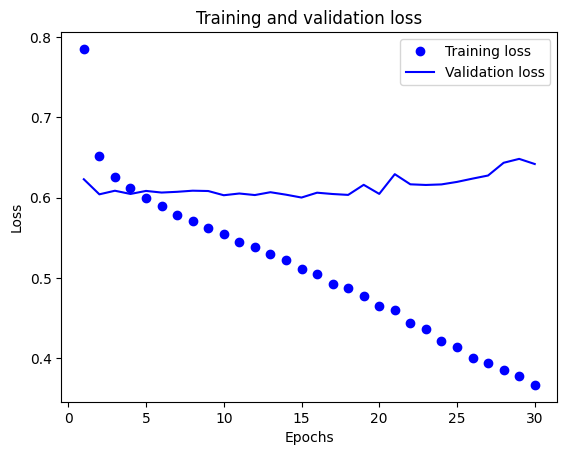

In [ ]:
# Precisión de entrenamiento y validación

loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

**Evaluación del modelo**




In [ ]:
model.evaluate(X, Y)

20/20 [==============================] - 0s 2ms/step - loss: 0.4355 - accuracy: 0.8263


[0.43553686141967773, 0.826298713684082]

**Predicciones**

In [ ]:
model.predict(X)

20/20 [==============================] - 0s 2ms/step


array([[9.9112052e-01, 7.9475604e-03, 9.3183189e-04],
       [9.9046147e-01, 9.1566592e-03, 3.8187526e-04],
       [8.5368329e-01, 1.2235716e-01, 2.3959475e-02],
       ...,
       [2.6694363e-01, 7.3222995e-01, 8.2643051e-04],
       [9.6233392e-01, 3.7407186e-02, 2.5882851e-04],
       [9.3735427e-01, 5.3913213e-02, 8.7324372e-03]], dtype=float32)

# **Conclusiones**



Debido a que cada punto de datos debe clasificarse en una sola categoría (Music effects), el problema a modelar es específicamente una instancia de clasificación multiclase de una sola etiqueta. Por ello, un modelo secuencial es una buena opción. 

En un primer momento (Red Neuronal V1) decidí utilizar como métrica categorical accuracy (precisión categórica), como función de perdida categorical crossentropy (entropía cruzada categórica) y RMprop (Root Mean Square Propagation) como algoritmo de optimización. 

Con esto obtuve:
*   Una perdida (loss) de 0.5, el cual puede considerarse una perdida moderada.
*   Una exactitud categórica (categorical_accuracy) de entre 0.7 y 0.8, es decir que la red neuronal está clasificando correctamente el 70% a 80% de los datos de entrada.
*   Una perdida de validación (val_loss) y una exactitud categorica de validación (val_categorical_accuracy) muy similares a los resultados anteriormente mencionados.

Por lo tanto, creo que la red neuronal está produciendo resultados moderadamente precisos.

Posteriormente, realicé algunas modificaciones (se pueden observar en Red Neuronal V2):

*  Pasé de 64 nodos a 75 [no hice un aumento demasiado brusco de nodos en la red neuronal para no llevarla a un sobreajuste (overfitting)]
*  Utilicé como optimizador Adam (Adaptive Moment Estimation), que es útil también para los casos de clasificación
*  Coloqué como métrica simplemente accuracy
*  Modifiqué el conjunto de filas de 100 a 144 (la mitad de 72 y 216, de las 721 filas) en la preparacion del conjunto de validacion

Con estas modificaciones obtuve una leve mejoría, entiendase, una precisión de clasificación del 83% en el conjunto de entrada, una perdida del 0.4 del conjunto de datos de prueba y una precisión de validación ligeramente mayor que la precisión de entrenamiento, lo que sugiere que el modelo está generalizando bien. 
En general, estos valores indican que el modelo tiene un rendimiento aún aceptable, pero podría mejorarse.
